**K-Means Clustering**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns
sns.axes_style("darkgrid")

{'figure.facecolor': 'white',
 'axes.labelcolor': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'axes.axisbelow': True,
 'grid.linestyle': '-',
 'text.color': '.15',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'image.cmap': 'rocket',
 'xtick.top': False,
 'ytick.right': False,
 'axes.grid': True,
 'axes.facecolor': '#EAEAF2',
 'axes.edgecolor': 'white',
 'grid.color': 'white',
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True,
 'xtick.bottom': False,
 'ytick.left': False}

In [3]:
#Read Data
df = pd.read_excel("EastWestAirlines.xlsx")

In [4]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [5]:
df.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
ID#                  3999 non-null int64
Balance              3999 non-null int64
Qual_miles           3999 non-null int64
cc1_miles            3999 non-null int64
cc2_miles            3999 non-null int64
cc3_miles            3999 non-null int64
Bonus_miles          3999 non-null int64
Bonus_trans          3999 non-null int64
Flight_miles_12mo    3999 non-null int64
Flight_trans_12      3999 non-null int64
Days_since_enroll    3999 non-null int64
Award?               3999 non-null int64
dtypes: int64(12)
memory usage: 375.0 KB


In [7]:
#Dropping ID column
df.drop(['ID#'], axis=1, inplace=True)

In [63]:
#Using Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [66]:
scaler.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [68]:
scaled_features = scaler.transform(df)

In [69]:
df_feat = pd.DataFrame(scaled_features, columns=df.columns)

In [70]:
df_feat.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918


In [14]:
from sklearn.cluster import KMeans

In [15]:
#Initializing K-Means
km = KMeans(n_clusters=9)

In [16]:
y_pred = km.fit_predict(df_feat)
y_pred

array([1, 1, 1, ..., 0, 3, 3])

In [17]:
km.inertia_

15960.406001471114

In [18]:
km.cluster_centers_

array([[-1.66054043e-01, -6.19338455e-02, -2.79842565e-01,
        -9.82418871e-02, -6.27665798e-02, -2.81133807e-01,
        -1.25269134e-01, -3.23758035e-02, -2.75935498e-02,
         6.65642402e-02,  1.30391816e+00],
       [-1.53668481e-01, -1.43363406e-01, -4.32479545e-01,
        -9.82418871e-02, -5.74361725e-02, -4.66095287e-01,
        -3.54398373e-01, -2.04890647e-01, -2.28277865e-01,
         7.42352050e-01, -7.66919299e-01],
       [ 3.39003056e-01, -1.09415172e-01,  1.53422569e+00,
        -9.82418871e-02, -4.97321740e-02,  1.24157916e+00,
         8.57340407e-01, -8.41335661e-02, -9.17943098e-02,
         3.50566142e-01,  4.97714263e-01],
       [-3.83926774e-01, -1.43909369e-01, -5.80588869e-01,
        -9.82418871e-02, -6.27665798e-02, -5.24876450e-01,
        -5.13194491e-01, -2.30324150e-01, -2.51945574e-01,
        -9.83907351e-01, -7.66919299e-01],
       [ 5.18868565e-01,  3.74852037e-01,  9.05726570e-02,
        -9.82418871e-02, -6.27665798e-02,  5.80232924e-01,
  

In [19]:
#Adding cluster column
df_feat['cluster']=y_pred
df_feat.head()

,0,1,2,3,4,5,6,7,8,9,10,cluster
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919,1
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919,1
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919,1
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919,1
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918,2


In [20]:
df_feat['cluster'].value_counts()

3    1153
1     961
0     792
2     786
4     114
8      80
6      55
7      43
5      15
Name: cluster, dtype: int64

In [21]:
#Sum of Squared Error and lopping the k-value in 1 to 15
sse = []
k_rng = range(1,15)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df_feat)
    sse.append(km.inertia_)

In [22]:
sse

[54686.593398349585,
 44180.273673525706,
 37243.68147121749,
 31899.89516942086,
 28006.821720732907,
 24601.848042521528,
 21654.423442398922,
 18523.083592938427,
 15960.406001471112,
 14996.326183926665,
 14216.095370421726,
 13636.71146150295,
 13068.636762593624,
 12621.95566293795]

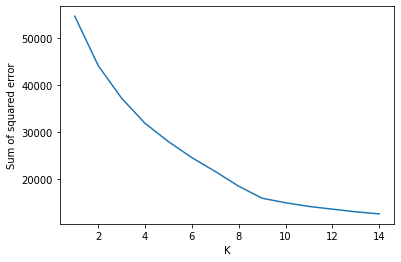

In [23]:
#Plotting K vs SSE
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

**Hierarchical Clustering**

In [73]:
import scipy
from scipy.cluster.hierarchy import dendrogram,linkage
import scipy.cluster.hierarchy as sch

In [75]:
df_feat

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918
...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.547079,-0.186299,-0.769578,-0.098242,-0.062767,-0.356960,-0.791649,-0.185750,-0.098503,-1.315120,1.303918
3995,-0.091465,-0.186299,-0.769578,-0.098242,-0.062767,-0.669367,-0.687511,-0.328603,-0.362168,-1.318994,1.303918
3996,-0.000043,-0.186299,0.683121,-0.098242,-0.062767,0.343804,-0.375096,-0.328603,-0.362168,-1.315604,1.303918
3997,-0.185607,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,0.028531,-0.098503,-1.316088,-0.766919


In [76]:
z = linkage(df_feat, method='complete', metric='euclidean')

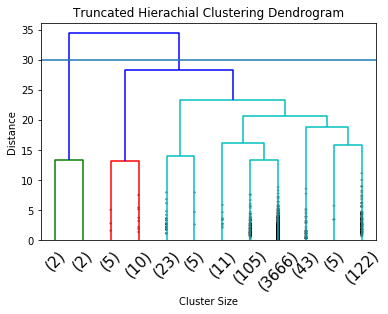

In [78]:
#generate dendrogram
dendrogram(z,truncate_mode= "lastp", p =12, leaf_rotation=45,leaf_font_size=15, show_contracted=True)
plt.title("Truncated Hierachial Clustering Dendrogram")
plt.xlabel("Cluster Size")
plt.ylabel("Distance")
#divide the cluster
plt.axhline(y=110)
plt.axhline(65)
plt.axhline(30)
plt.show()